# import transcriptome coverages and make histograms

In [1]:
!ls *.csv

SRR948553-bb-trim29-a-v2_vs_SRR948555-bb-trim29-a-v2_correlation_table.csv
SRR948553-bb-trim29-k1-v2_vs_SRR948555-bb-trim29-k1-v2_correlation_table.csv
SRR948553-bb-trim29-v2-m1_vs_SRR948555-bb-trim29-v2-m1_correlation_table.csv


In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob, os
np.set_printoptions(suppress=True)
from optimal_colors import op_colors
from matplotlib import cycler
colors = cycler('color',op_colors())
# colors = cycler('color', ['#bb2c23', '#3388BB', '#7458e2', '#31b93b', '#f57f1f', '#2fded9'])
plt.rc('axes', facecolor='w', edgecolor='k',
       linewidth=1.5, grid=False, prop_cycle=colors, labelcolor='k')
plt.rc('grid', color='k', linestyle='solid', linewidth=0)
plt.rc('xtick', direction='in', color='k')
plt.rc('xtick.major', width=1.5, size=5)
plt.rc('ytick', direction='in', color='k')
plt.rc('ytick.major', width=1.5, size=5)
plt.rc('patch', edgecolor='k', linewidth=1,
       force_edgecolor=True)  # patch is like bar
plt.rc('lines', linewidth=1.5)
plt.rc('font', size=16, **{'family': 'sans-serif', 'sans-serif': ['Arial']})
plt.rc('figure', figsize=(11, 7))
plt.rc('text',color='k')
# plt.rcParams.keys()
plt.rcParams.update()

In [8]:
corrA = pd.read_csv('SRR948553-bb-trim29-a-v2_vs_SRR948555-bb-trim29-a-v2_correlation_table.csv').dropna()
corrA.head()

,transc,R (pearson correlation),R squared
0,Q0045,-0.032475,0.001055
1,Q0050,0.992248,0.984557
4,Q0065,-0.025201,0.000635
5,Q0070,-0.022175,0.000492
8,Q0085,0.068614,0.004708


In [9]:
corrA.describe()

,R (pearson correlation),R squared
count,5641.000000,5.641000e+03
mean,0.557968,3.710349e-01
std,0.244371,2.425619e-01
min,-0.358832,1.832503e-08
25%,0.415427,1.725798e-01
50%,0.594558,3.534992e-01
75%,0.737538,5.439626e-01
max,0.999885,9.997692e-01


## it might also be good to know the total read counts here

In [17]:
!find . -name "*-aligns_per_gene.txt" ! -name "*-a_suppr_realigned-aligns_per_gene.txt" ! -name "29-mers-orf_coding-FILTERED1*"

./SRR948553_BBduk2_NEBtrim-rRNA-bbmap_trim_29-alignment--norc-a-v2-p4/SRR948553_BBduk2_NEBtrim-rRNA-bbmap_trim_29--norc-a-v2-p4-aligns_per_gene.txt
./SRR948553_BBduk2_NEBtrim-rRNA-bbmap_trim_29-alignment--norc-k1-v2-p4/SRR948553_BBduk2_NEBtrim-rRNA-bbmap_trim_29--norc-k1-v2-p4-aligns_per_gene.txt
./SRR948553_BBduk2_NEBtrim-rRNA-bbmap_trim_29-alignment--norc-v2-p4-m1/SRR948553_BBduk2_NEBtrim-rRNA-bbmap_trim_29--norc-v2-p4-m1-aligns_per_gene.txt
./SRR948555_BBduk2_NEBtrim-rRNA-bbmap_trim_29-alignment--norc-a-v2-p4/SRR948555_BBduk2_NEBtrim-rRNA-bbmap_trim_29--norc-a-v2-p4-aligns_per_gene.txt
./SRR948555_BBduk2_NEBtrim-rRNA-bbmap_trim_29-alignment--norc-k1-v2-p4/SRR948555_BBduk2_NEBtrim-rRNA-bbmap_trim_29--norc-k1-v2-p4-aligns_per_gene.txt
./SRR948555_BBduk2_NEBtrim-rRNA-bbmap_trim_29-alignment--norc-v2-p4-m1/SRR948555_BBduk2_NEBtrim-rRNA-bbmap_trim_29--norc-v2-p4-m1-aligns_per_gene.txt


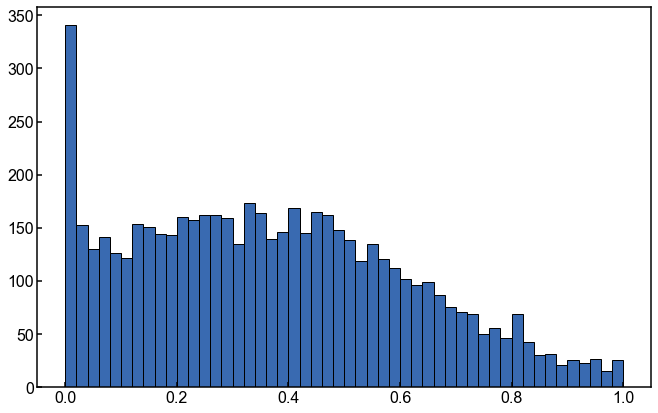

In [22]:
# corrA[corrA['R squared']>0.01]['R squared'].hist(bins = 50)
corrA['R squared'].hist(bins = 50)

## alignments with -a:
- **correlation:** `SRR948553-bb-trim29-a-v2_vs_SRR948555-bb-trim29-a-v2_correlation_table.csv`
- **SRR948553 align counts:** `./SRR948553_BBduk2_NEBtrim-rRNA-bbmap_trim_29-alignment--norc-a-v2-p4/SRR948553_BBduk2_NEBtrim-rRNA-bbmap_trim_29--norc-a-v2-p4-aligns_per_gene.txt`
- **SRR948555 align counts:** `./SRR948555_BBduk2_NEBtrim-rRNA-bbmap_trim_29-alignment--norc-a-v2-p4/SRR948555_BBduk2_NEBtrim-rRNA-bbmap_trim_29--norc-a-v2-p4-aligns_per_gene.txt`

## alignments with -m 1:
- **correlation:** `SRR948553-bb-trim29-v2-m1_vs_SRR948555-bb-trim29-v2-m1_correlation_table.csv`
- **SRR948553 align counts:** `./SRR948553_BBduk2_NEBtrim-rRNA-bbmap_trim_29-alignment--norc-v2-p4-m1/SRR948553_BBduk2_NEBtrim-rRNA-bbmap_trim_29--norc-v2-p4-m1-aligns_per_gene.txt`
- **SRR948555 align counts:** `./SRR948555_BBduk2_NEBtrim-rRNA-bbmap_trim_29-alignment--norc-v2-p4-m1/SRR948555_BBduk2_NEBtrim-rRNA-bbmap_trim_29--norc-v2-p4-m1-aligns_per_gene.txt`

## alignments with -k 1:
- **correlation:** `SRR948553-bb-trim29-k1-v2_vs_SRR948555-bb-trim29-k1-v2_correlation_table.csv`
- **SRR948553 align counts:** `./SRR948553_BBduk2_NEBtrim-rRNA-bbmap_trim_29-alignment--norc-k1-v2-p4/SRR948553_BBduk2_NEBtrim-rRNA-bbmap_trim_29--norc-k1-v2-p4-aligns_per_gene.txt`
- **SRR948555 align counts:** `./SRR948555_BBduk2_NEBtrim-rRNA-bbmap_trim_29-alignment--norc-k1-v2-p4/SRR948555_BBduk2_NEBtrim-rRNA-bbmap_trim_29--norc-k1-v2-p4-aligns_per_gene.txt`

In [32]:
filedict = {}

In [33]:
a_corr_path = 'SRR948553-bb-trim29-a-v2_vs_SRR948555-bb-trim29-a-v2_correlation_table.csv'
R553_a_counts_path = './SRR948553_BBduk2_NEBtrim-rRNA-bbmap_trim_29-alignment--norc-a-v2-p4/SRR948553_BBduk2_NEBtrim-rRNA-bbmap_trim_29--norc-a-v2-p4-aligns_per_gene.txt'
R555_a_counts_path = './SRR948555_BBduk2_NEBtrim-rRNA-bbmap_trim_29-alignment--norc-a-v2-p4/SRR948555_BBduk2_NEBtrim-rRNA-bbmap_trim_29--norc-a-v2-p4-aligns_per_gene.txt'
filedict['a'] = (a_corr_path, R553_a_counts_path, R555_a_counts_path)
filedict

{'a': ('SRR948553-bb-trim29-a-v2_vs_SRR948555-bb-trim29-a-v2_correlation_table.csv',
  './SRR948553_BBduk2_NEBtrim-rRNA-bbmap_trim_29-alignment--norc-a-v2-p4/SRR948553_BBduk2_NEBtrim-rRNA-bbmap_trim_29--norc-a-v2-p4-aligns_per_gene.txt',
  './SRR948555_BBduk2_NEBtrim-rRNA-bbmap_trim_29-alignment--norc-a-v2-p4/SRR948555_BBduk2_NEBtrim-rRNA-bbmap_trim_29--norc-a-v2-p4-aligns_per_gene.txt')}

In [34]:
m1_corr_path = 'SRR948553-bb-trim29-v2-m1_vs_SRR948555-bb-trim29-v2-m1_correlation_table.csv'
R553_m1_counts_path = './SRR948553_BBduk2_NEBtrim-rRNA-bbmap_trim_29-alignment--norc-v2-p4-m1/SRR948553_BBduk2_NEBtrim-rRNA-bbmap_trim_29--norc-v2-p4-m1-aligns_per_gene.txt'
R555_m1_counts_path = './SRR948555_BBduk2_NEBtrim-rRNA-bbmap_trim_29-alignment--norc-v2-p4-m1/SRR948555_BBduk2_NEBtrim-rRNA-bbmap_trim_29--norc-v2-p4-m1-aligns_per_gene.txt'
filedict['m1'] = (m1_corr_path, R553_m1_counts_path, R555_m1_counts_path)

k1_corr_path = 'SRR948553-bb-trim29-k1-v2_vs_SRR948555-bb-trim29-k1-v2_correlation_table.csv'
R553_k1_counts_path = './SRR948553_BBduk2_NEBtrim-rRNA-bbmap_trim_29-alignment--norc-k1-v2-p4/SRR948553_BBduk2_NEBtrim-rRNA-bbmap_trim_29--norc-k1-v2-p4-aligns_per_gene.txt'
R555_k1_counts_path = './SRR948555_BBduk2_NEBtrim-rRNA-bbmap_trim_29-alignment--norc-k1-v2-p4/SRR948555_BBduk2_NEBtrim-rRNA-bbmap_trim_29--norc-k1-v2-p4-aligns_per_gene.txt'
filedict['k1'] = (k1_corr_path, R553_k1_counts_path, R555_k1_counts_path)

In [41]:
import pprint
pprint.pprint(filedict)

{'a': ('SRR948553-bb-trim29-a-v2_vs_SRR948555-bb-trim29-a-v2_correlation_table.csv',
       './SRR948553_BBduk2_NEBtrim-rRNA-bbmap_trim_29-alignment--norc-a-v2-p4/SRR948553_BBduk2_NEBtrim-rRNA-bbmap_trim_29--norc-a-v2-p4-aligns_per_gene.txt',
       './SRR948555_BBduk2_NEBtrim-rRNA-bbmap_trim_29-alignment--norc-a-v2-p4/SRR948555_BBduk2_NEBtrim-rRNA-bbmap_trim_29--norc-a-v2-p4-aligns_per_gene.txt'),
 'k1': ('SRR948553-bb-trim29-k1-v2_vs_SRR948555-bb-trim29-k1-v2_correlation_table.csv',
        './SRR948553_BBduk2_NEBtrim-rRNA-bbmap_trim_29-alignment--norc-k1-v2-p4/SRR948553_BBduk2_NEBtrim-rRNA-bbmap_trim_29--norc-k1-v2-p4-aligns_per_gene.txt',
        './SRR948555_BBduk2_NEBtrim-rRNA-bbmap_trim_29-alignment--norc-k1-v2-p4/SRR948555_BBduk2_NEBtrim-rRNA-bbmap_trim_29--norc-k1-v2-p4-aligns_per_gene.txt'),
 'm1': ('SRR948553-bb-trim29-v2-m1_vs_SRR948555-bb-trim29-v2-m1_correlation_table.csv',
        './SRR948553_BBduk2_NEBtrim-rRNA-bbmap_trim_29-alignment--norc-v2-p4-m1/SRR948553_BBduk2_NE

could also have put the paths in a dictionary or a list or a dictionary with tuples

I don't know what's better

In [48]:
def importdf(filename,var_name):
    df = pd.read_table(filename, sep='\t', header=None, names=['gene', 'length', var_name, 'junk'])
    df = df[df['gene'] != '*']
    df = df.drop(['junk','length'], axis=1)
#     df = df.set_index('gene')
    return df

In [43]:
pd.read_table('./SRR948553_BBduk2_NEBtrim-rRNA-bbmap_trim_29-alignment--norc-a-v2-p4/SRR948553_BBduk2_NEBtrim-rRNA-bbmap_trim_29--norc-a-v2-p4-aligns_per_gene.txt', sep='\t', header=None, names=['gene', 'length', 'counts', 'junk']).head()

,gene,length,counts,junk
0,YAL001C,3483,431,0
1,YAL002W,3825,287,0
2,YAL003W,621,30501,0
3,YAL005C,1929,114671,0
4,YAL007C,648,1644,0


In [49]:
R553_a_counts = importdf(filedict['a'][1],'R553_a_counts')
R553_a_counts.head()

,gene,R553_a_counts
0,YAL001C,431
1,YAL002W,287
2,YAL003W,30501
3,YAL005C,114671
4,YAL007C,1644


In [50]:
R555_a_counts = importdf(filedict['a'][2],'R555_a_counts')
R555_a_counts.head()

,gene,R555_a_counts
0,YAL001C,242
1,YAL002W,189
2,YAL003W,27272
3,YAL005C,83783
4,YAL007C,1153


In [51]:
a_counts = pd.merge(R553_a_counts,R555_a_counts,on = 'gene')
a_counts.head()

,gene,R553_a_counts,R555_a_counts
0,YAL001C,431,242
1,YAL002W,287,189
2,YAL003W,30501,27272
3,YAL005C,114671,83783
4,YAL007C,1644,1153


In [52]:
a_corr = pd.read_csv(filedict['a'][0])
a_corr.head()

,transc,R (pearson correlation),R squared
0,Q0045,-0.032475,0.001055
1,Q0050,0.992248,0.984557
2,Q0055,NaN,NaN
3,Q0060,NaN,NaN
4,Q0065,-0.025201,0.000635


In [53]:
print('length a_corr == length of a_counts? {}'.format(len(a_corr)==len(a_counts)))

length a_corr == length of a_counts? True


In [55]:
a_table = pd.merge(a_corr,a_counts,left_on='transc',right_on='gene')
a_table.head()

,transc,R (pearson correlation),R squared,gene,R553_a_counts,R555_a_counts
0,Q0045,-0.032475,0.001055,Q0045,3,1
1,Q0050,0.992248,0.984557,Q0050,3,3
2,Q0055,NaN,NaN,Q0055,0,2
3,Q0060,NaN,NaN,Q0060,0,0
4,Q0065,-0.025201,0.000635,Q0065,2,1


## so NaNs are from low read counts probably. as expected

In [71]:
a_table[a_table.isnull().any(axis=1)].describe()

,R (pearson correlation),R squared,R553_a_counts,R555_a_counts
count,0.0,0.0,185.000000,185.000000
mean,NaN,NaN,0.459459,0.275676
std,NaN,NaN,0.926500,0.747970
min,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,0.000000,0.000000
50%,NaN,NaN,0.000000,0.000000
75%,NaN,NaN,1.000000,0.000000
max,NaN,NaN,5.000000,4.000000


## filter out transcripts with low read counts

have to choose a cutoff

what percentage of the transcripts do you remove with different cutoffs?

In [86]:
cutoffs = np.arange(0,1000,50)
cutoffs[0] = 1
print('cutoff | percent of transcripts with counts below cutoff')
for cutoff in cutoffs:
    n_rem = len(a_table[((a_table['R553_a_counts']<cutoff) | (a_table['R555_a_counts']<cutoff))])
    tot = len(a_table)
    print('{} | {}'.format(cutoff,(n_rem/tot)*100))

cutoff | percent of transcripts with counts below cutoff
1 | 3.1754205286646067
50 | 14.967387572948851
100 | 23.892893923789906
150 | 32.646755921730175
200 | 40.59388946103673
250 | 47.08204600068658
300 | 51.93958118777893
350 | 56.50532097493992
400 | 60.350154479917606
450 | 63.90319258496395
500 | 67.0614486783385
550 | 69.39581187778921
600 | 71.3697219361483
650 | 73.12049433573635
700 | 74.51081359423274
750 | 75.6951596292482
800 | 76.77651905252317
850 | 77.8063851699279
900 | 79.09371781668384
950 | 79.90044627531753


Text(0,0.5,'percent of transcripts below cutoff')

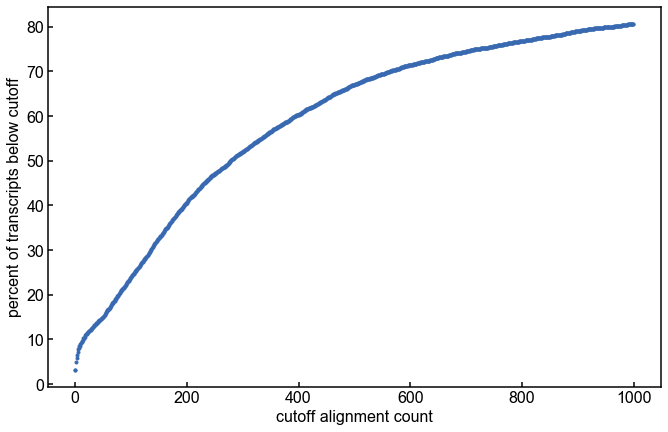

In [93]:
cutoffs = np.arange(0,1000,1)
cutoffs[0] = 1
perc = []
for cutoff in cutoffs:
    n_rem = len(a_table[((a_table['R553_a_counts']<cutoff) | (a_table['R555_a_counts']<cutoff))])
    tot = len(a_table)
    perc.append((n_rem/tot)*100)
plt.plot(cutoffs,perc,'.')
plt.xlabel('cutoff alignment count')
plt.ylabel('percent of transcripts below cutoff')

### let's just try of cutoff of 200 alignments

In [109]:
cutoff = 200
a_t2 = a_table[((a_table['R553_a_counts']>cutoff) & (a_table['R555_a_counts']>cutoff))].copy()

In [100]:
a_t2.head()

,transc,R (pearson correlation),R squared,gene,R553_a_counts,R555_a_counts
20,R0020C,0.853599,0.728630,R0020C,1261,815
21,R0030W,0.645333,0.416455,R0030W,335,222
22,R0040C,0.940067,0.883726,R0040C,1128,812
23,YAL001C,0.340338,0.115830,YAL001C,431,242
25,YAL003W,0.830077,0.689029,YAL003W,30501,27272


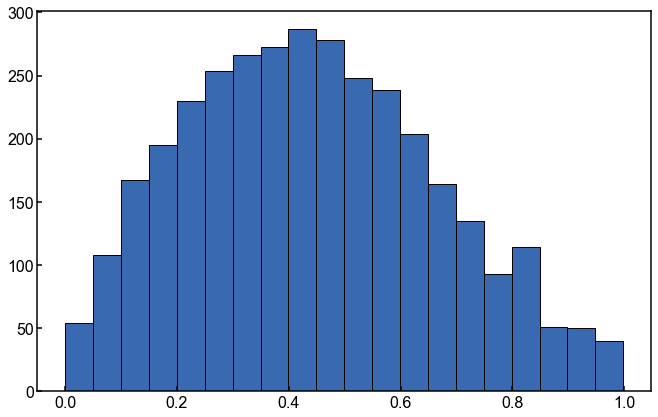

In [110]:
a_t2['R squared'].hist(bins = 20)

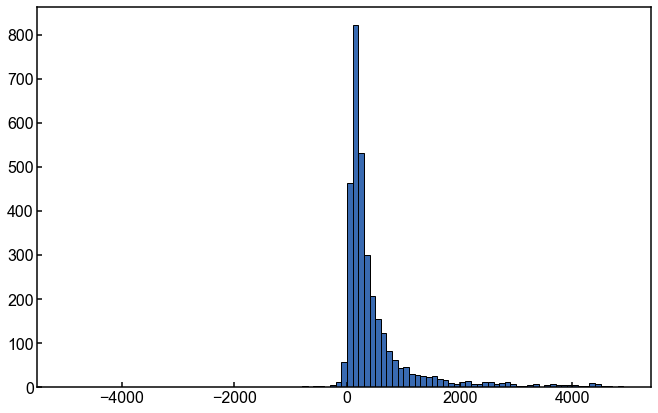

In [105]:
a_t2['count diff'] = a_t2['R553_a_counts'] - a_t2['R555_a_counts']
a_t2['count diff'].hist(bins = np.arange(-5000,5000,100))
# plt.xlim([-1000,1000])